In [1]:
import pandas as pd
import numpy as np
import math
import json
import re
import matplotlib.pyplot as plt
from datetime import datetime

In [56]:
import warnings
warnings.simplefilter("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
portfolio = pd.read_csv('/content/drive/MyDrive/Udacity/portfolio.csv')
profile = pd.read_csv('/content/drive/MyDrive/Udacity/profile.csv')
transcript = pd.read_csv('/content/drive/MyDrive/Udacity/transcript.csv')
df = pd.read_csv('/content/drive/MyDrive/Udacity/df.csv')

In [54]:
def sorting_function(df):
  """
  function for sorting age_group columns
  """
  custom_order = ['<26', '26-35', '36-45', '46-55', '56-65', '65<']

  # Sort the DataFrame based on the custom order
  df['age_group'] = pd.Categorical(df['age_group'], categories=custom_order,
                                   ordered=True)
  sorted_df = df.sort_values(by='age_group')
  return sorted_df

How many people based on age group

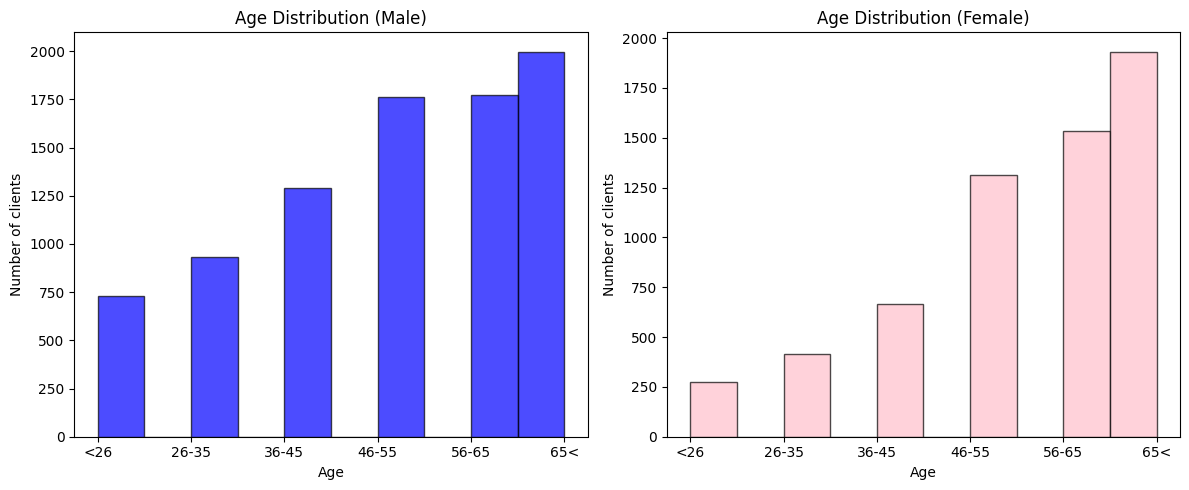

In [57]:
#split gender into two columns
male_data = sorting_function(profile[profile['gender'] == 'M'])
female_data = sorting_function(profile[profile['gender'] == 'F'])

# Create two subplots (one for each gender)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the age distribution for males
axes[0].hist(male_data['age_group'], bins=10, edgecolor='black', alpha=0.7,
             color='blue')
axes[0].set_title('Age Distribution (Male)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number of clients')

# Plot the age distribution for females
axes[1].hist(female_data['age_group'], bins=10, edgecolor='black', alpha=0.7,
             color='pink')
axes[1].set_title('Age Distribution (Female)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Number of clients')

# Display the plots
plt.tight_layout()
plt.show()

Age distribution by gender

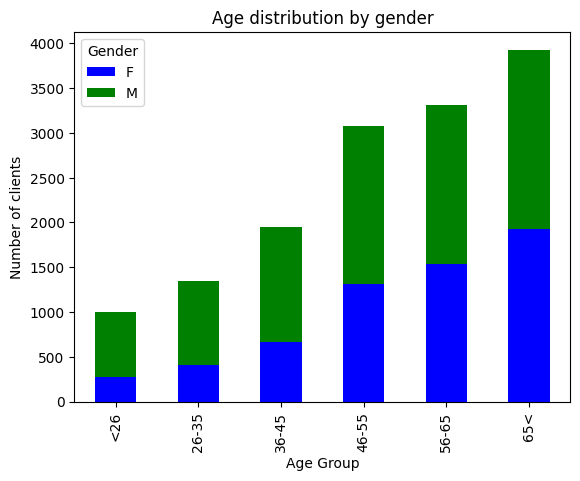

In [58]:
#filter out onlu men/female
profile2 = sorting_function(profile[(profile['gender'] == "F")\
                                    | (profile['gender'] == "M")])

#pivot table age_group vs gender
age_group_counts = profile2.pivot_table(index='age_group', columns='gender',
                                        aggfunc='size', fill_value=0)

# Plot the age group distributions by gender
age_group_counts.plot(kind='bar', stacked=True, color=['blue', 'green'])

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of clients')
plt.title('Age distribution by gender')

# Display the plot
plt.legend(title='Gender')
plt.show()

Plot histogram on time column

<Axes: >

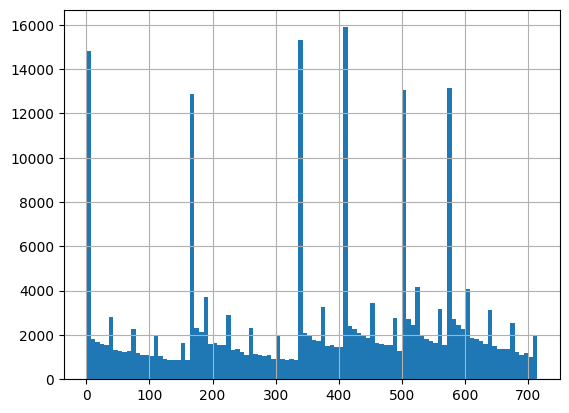

In [8]:
transcript.time.hist(bins=100)

Number of completed offers based on age group

In [59]:
def pivot_age_event(offer_type):
    """
    create filtered df and pivot table
    """
    #filter out bogo completed offers
    df_bogo = df[(df[offer_type] == 1) & (df.event == "offer completed")]
    df_bogo = sorting_function(df_bogo)
    #create pivot table age group vs event
    df_bogop = df_bogo.pivot_table(values=["event"], index=["age_group"],
                               aggfunc=['count']).reset_index()
    #concatenate multiindex columns to one line
    df_bogop.columns = [f'{col[0]}_{col[1]}' if col[1] else col[0] for col \
                    in df_bogop.columns]
    return df_bogo, df_bogop

In [60]:
#prepare df
df_bogo, df_bogop = pivot_age_event("offer_type_bogo")
df_discount, df_discountp = pivot_age_event("offer_type_discount")

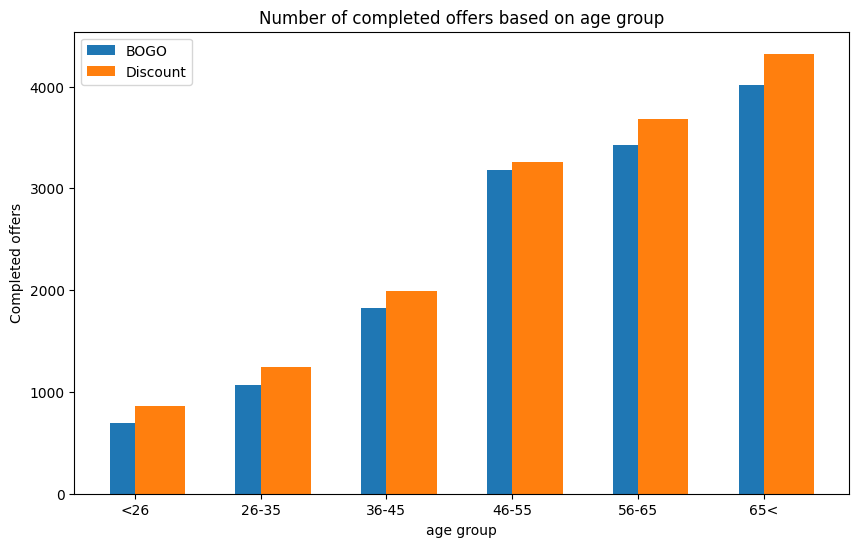

In [61]:
#plot graph
plt.figure(figsize=(10, 6))
plt.bar(df_bogop["age_group"], df_bogop["count_event"], width=0.4,
        label='BOGO', align='center')
plt.bar(df_discountp["age_group"], df_discountp["count_event"], width=0.4,
        label='Discount', align='edge')
plt.xlabel('age group')
plt.ylabel('Completed offers')
plt.title('Number of completed offers based on age group')
plt.legend()

plt.show()

Median transaction value of completed offers based on age group and offer type

In [62]:
#prepare df
df_bogoc = df_bogo.pivot_table(values=["amount"], index=["age_group"],
                               aggfunc=np.median).reset_index()

df_discountc = df_discount.pivot_table(values=["amount"], index=["age_group"],
                                       aggfunc=np.median).reset_index()

df_bogoc.head(10)

,age_group,amount
0,<26,11.990
1,26-35,12.215
2,36-45,15.280
3,46-55,18.240
4,56-65,18.770
5,65<,18.460


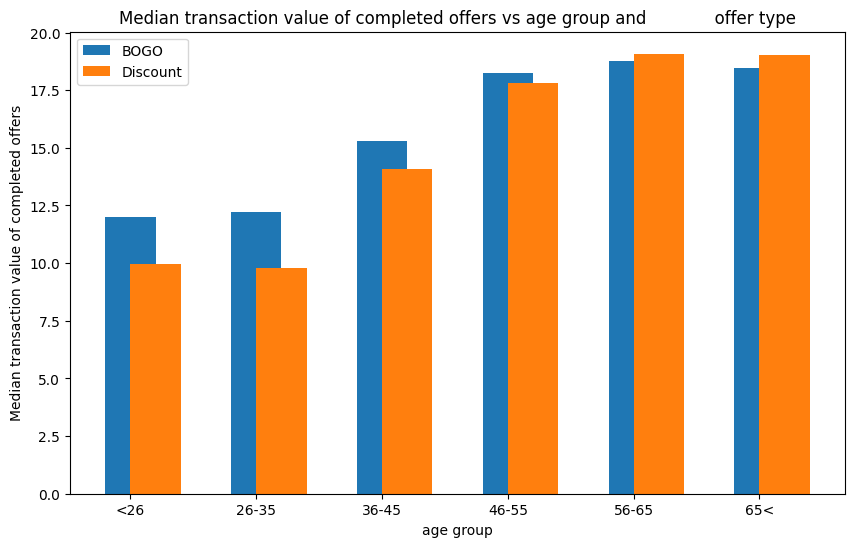

In [63]:
#plot results
plt.figure(figsize=(10, 6))
plt.bar(df_bogoc["age_group"], df_bogoc["amount"], width=0.4,
        label='BOGO', align='center')
plt.bar(df_discountc["age_group"], df_discountc["amount"], width=0.4,
        label='Discount', align='edge')
plt.xlabel('age group')
plt.ylabel('Median transaction value of completed offers')
plt.title('Median transaction value of completed offers vs age group and \
            offer type')
plt.legend()

plt.show()

Median transaction value of completed offers based on seniority

In [64]:
#prepare df
df_bogom = df_bogo.pivot_table(values=["amount"],
            index=["member_since_months"], aggfunc=np.median).reset_index()
df_discountm = df_discount.pivot_table(values=["amount"],
            index=["member_since_months"], aggfunc=np.median).reset_index()
df_bogom.head(10)

,member_since_months,amount
0,63.0,13.860
1,64.0,15.775
2,65.0,15.060
3,66.0,15.830
4,67.0,15.310
5,68.0,14.840
6,69.0,16.420
7,70.0,17.480
8,71.0,16.820
9,72.0,16.760


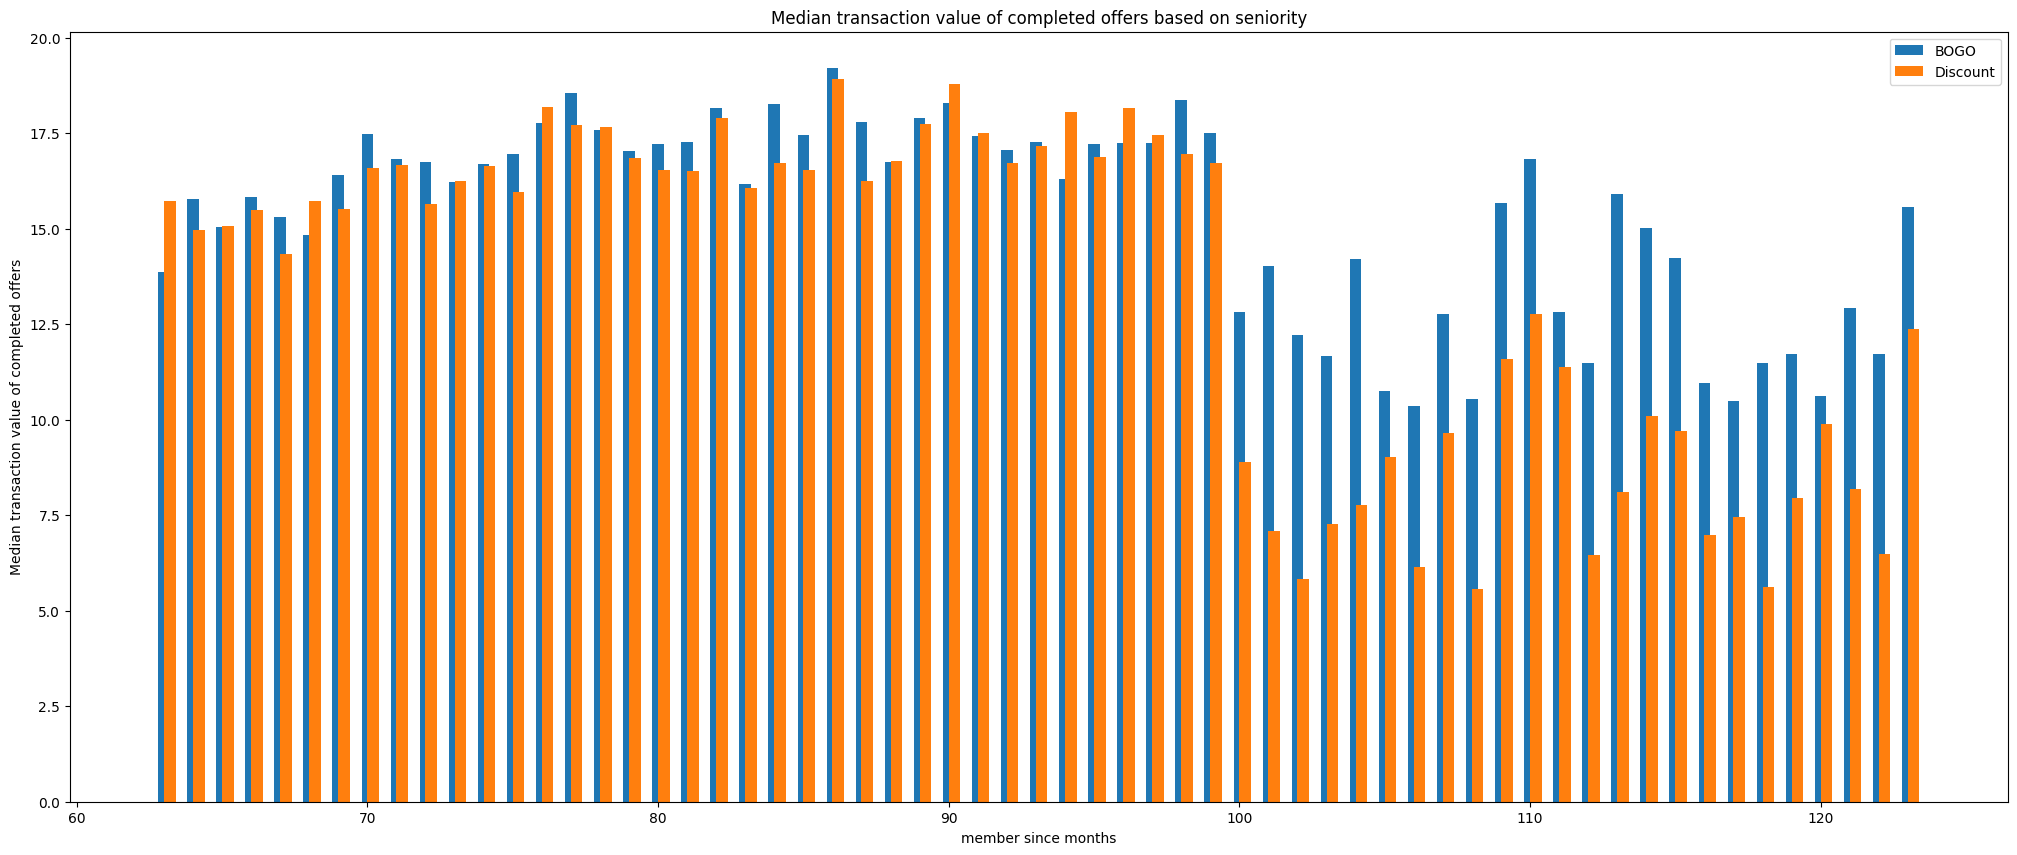

In [65]:
#plot results
plt.figure(figsize=(25, 10))
plt.bar(df_bogom["member_since_months"], df_bogom["amount"], width=0.4,
        label='BOGO', align='center')
plt.bar(df_discountm["member_since_months"], df_discountm["amount"], width=0.4,
        label='Discount', align='edge')
plt.xlabel('member since months')
plt.ylabel('Median transaction value of completed offers')
plt.title('Median transaction value of completed offers based on seniority')
plt.legend()

plt.show()

Offer received vs offer completed

In [66]:
#prepare df
df_1 = df[df.event=="offer completed"]
df_2 = df[df.event=="offer received"]

df_months = df_1.pivot_table(values=["event"], index=["member_since_months"],
                             aggfunc="count").reset_index()
df_months2 = df_2.pivot_table(values=["event"], index=["member_since_months"],
                              aggfunc="count").reset_index()

df_months.head(10)

,member_since_months,event
0,63.0,365
1,64.0,579
2,65.0,598
3,66.0,653
4,67.0,608
5,68.0,634
6,69.0,1008
7,70.0,1393
8,71.0,1226
9,72.0,1241


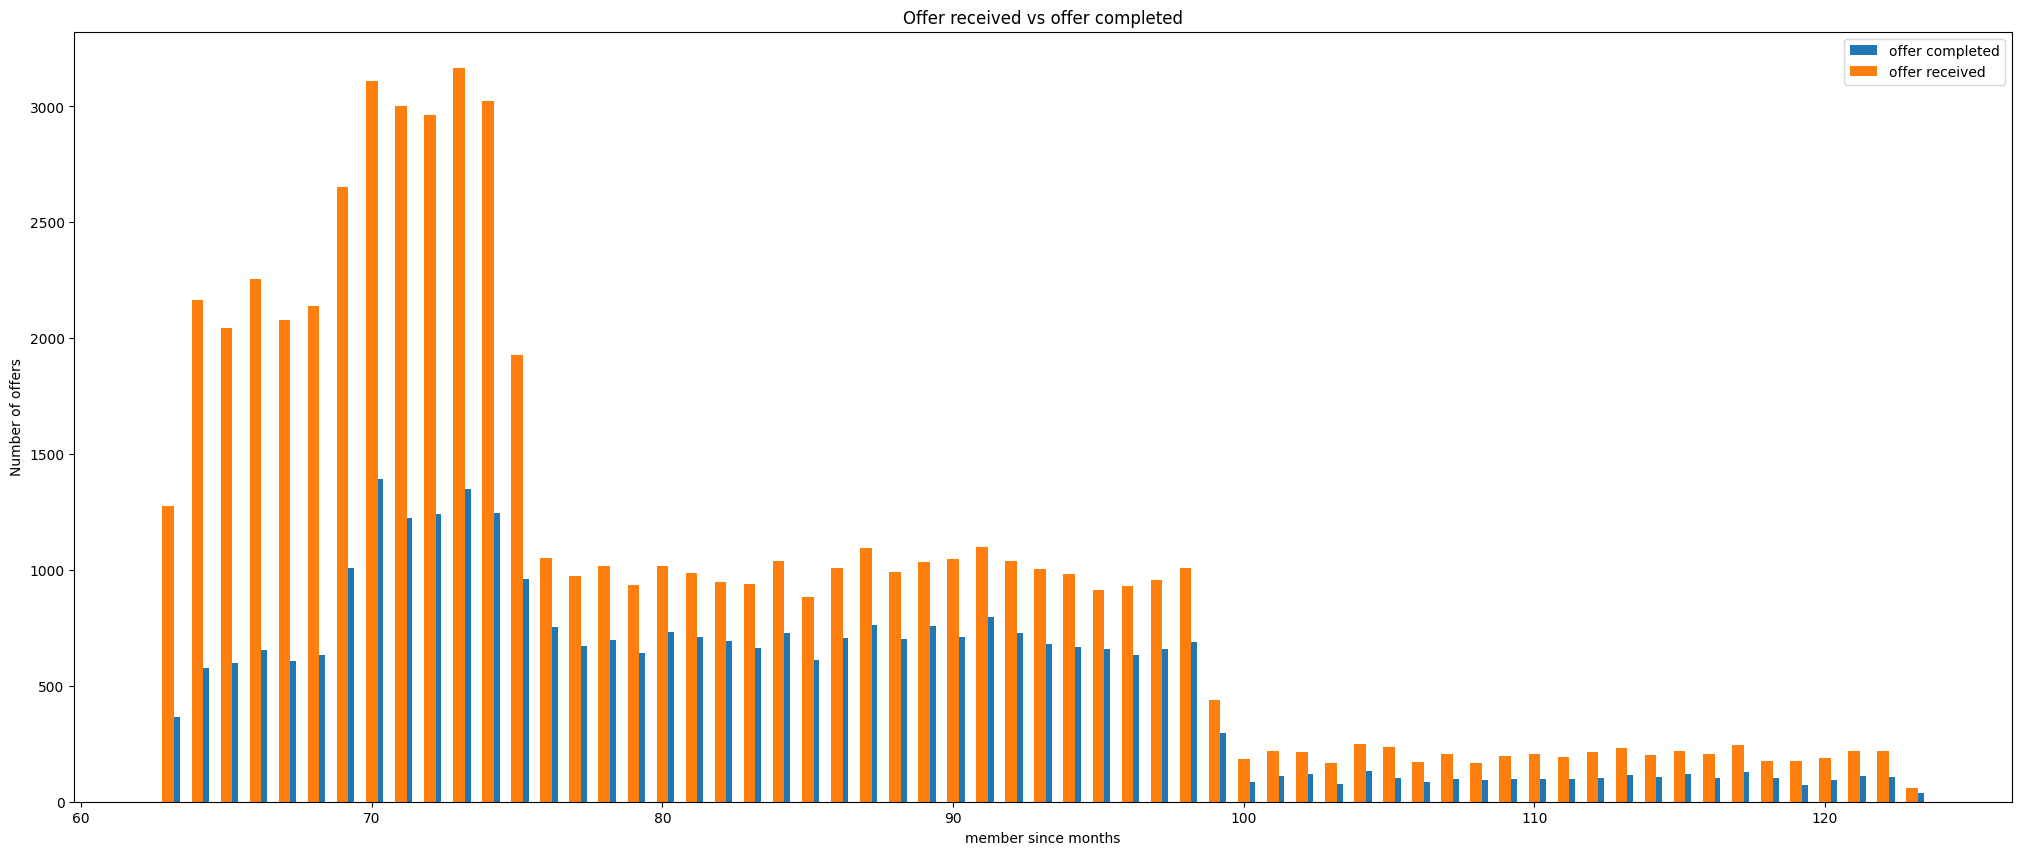

In [67]:
#plot results
plt.figure(figsize=(25, 10))
plt.bar(df_months["member_since_months"], df_months["event"], width=0.4,
        label='offer completed', align='edge')
plt.bar(df_months2["member_since_months"], df_months2["event"], width=0.4,
        label='offer received', align='center')
plt.xlabel('member since months')
plt.ylabel('Number of offers')
plt.title('Offer received vs offer completed')
plt.legend()

plt.show()

Offer completion time in hours

In [74]:
def completion_time(offer_type):
    """
    function creating pivot table which calculate completion time in hours

    Input: type of the offer (string)
    Output: dataframe
    """
    df_rc = df[(df.event=="offer received")|(df.event=="offer completed")]
    df_rc = sorting_function(df_rc[df_rc.offer_type==offer_type])


    # Utworzenie kolumny czasu otrzymania
    df_rc['time_received'] = df_rc['time'][df_rc['event'] == 'offer received']

    # Utworzenie kolumny czasu zakończenia
    df_rc['time_completed'] = df_rc['time'][df_rc['event'] == 'offer completed']

    # Utworzenie tabeli przestawnej
    pivot_table = df_rc.pivot_table(index=['person', 'age_group', 'offer_id'],
    values=['time_received', 'time_completed'], aggfunc='first').reset_index()
    pivot_table['duration_before_completion'] = pivot_table['time_completed'] \
    - pivot_table['time_received']

    pivot_table = pivot_table[pivot_table.duration_before_completion>0]
    pivot_table2 = pivot_table.pivot_table(index=[ 'age_group'],
      values=['duration_before_completion'], aggfunc=np.median).reset_index()

    return pivot_table2

In [75]:
pivot_table2 = completion_time("bogo")
pivot_table3 = completion_time("discount")

In [76]:
pivot_table2

,age_group,duration_before_completion
0,<26,48.0
1,26-35,48.0
2,36-45,48.0
3,46-55,48.0
4,56-65,48.0
5,65<,48.0


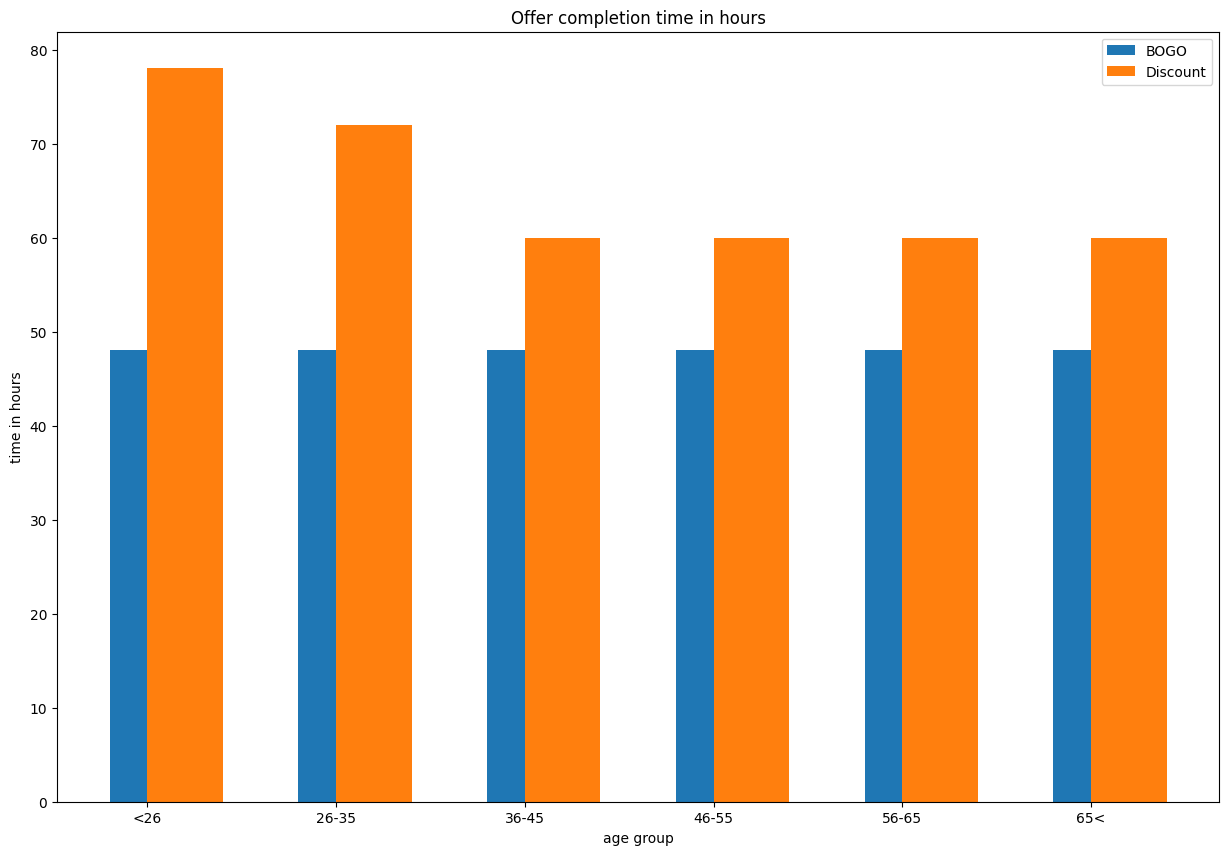

In [77]:
#plot results
pivot_table2 = pivot_table2.sort_values(by='age_group')
pivot_table3 = pivot_table3.sort_values(by='age_group')

plt.figure(figsize=(15, 10))
plt.bar(pivot_table2["age_group"], pivot_table2["duration_before_completion"],
        width=0.4, label='BOGO', align='center')
plt.bar(pivot_table3["age_group"], pivot_table3["duration_before_completion"],
        width=0.4, label='Discount', align='edge')
plt.xlabel('age group')
plt.ylabel('time in hours')
plt.title('Offer completion time in hours')
plt.legend()

plt.show()

In [78]:
#check test user
df[df.person =="0009655768c64bdeb2e877511632db8f"]

,Unnamed: 0,person,event,time,offer_id,amount,reward_x,offer_received,offer_viewed,offer_completed,...,offer_type,id_y,duration_hours,channels_email,channels_mobile,channels_web,channels_social,offer_type_bogo,offer_type_discount,offer_type_informational
0,0,0009655768c64bdeb2e877511632db8f,offer received,168,5a8bc65990b245e5a138643cd4eb9837,0.00,0.0,1,0,0,...,informational,5a8bc65990b245e5a138643cd4eb9837,72.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,0009655768c64bdeb2e877511632db8f,offer viewed,192,5a8bc65990b245e5a138643cd4eb9837,0.00,0.0,0,1,0,...,informational,5a8bc65990b245e5a138643cd4eb9837,72.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2,0009655768c64bdeb2e877511632db8f,transaction,228,0,22.16,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0009655768c64bdeb2e877511632db8f,offer received,336,3f207df678b143eea3cee63160fa8bed,0.00,0.0,1,0,0,...,informational,3f207df678b143eea3cee63160fa8bed,96.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
4,4,0009655768c64bdeb2e877511632db8f,offer viewed,372,3f207df678b143eea3cee63160fa8bed,0.00,0.0,0,1,0,...,informational,3f207df678b143eea3cee63160fa8bed,96.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
5,5,0009655768c64bdeb2e877511632db8f,offer received,408,f19421c1d4aa40978ebb69ca19b0e20d,0.00,0.0,1,0,0,...,bogo,f19421c1d4aa40978ebb69ca19b0e20d,120.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
6,6,0009655768c64bdeb2e877511632db8f,offer completed,414,f19421c1d4aa40978ebb69ca19b0e20d,8.57,5.0,0,0,1,...,bogo,f19421c1d4aa40978ebb69ca19b0e20d,120.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
7,7,0009655768c64bdeb2e877511632db8f,offer viewed,456,f19421c1d4aa40978ebb69ca19b0e20d,0.00,0.0,0,1,0,...,bogo,f19421c1d4aa40978ebb69ca19b0e20d,120.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
8,8,0009655768c64bdeb2e877511632db8f,offer received,504,fafdcd668e3743c1bb461111dcafc2a4,0.00,0.0,1,0,0,...,discount,fafdcd668e3743c1bb461111dcafc2a4,240.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
9,9,0009655768c64bdeb2e877511632db8f,offer completed,528,fafdcd668e3743c1bb461111dcafc2a4,14.11,2.0,0,0,1,...,discount,fafdcd668e3743c1bb461111dcafc2a4,240.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
